<a href="https://colab.research.google.com/github/felipemartenexen/ppgeo/blob/main/artigo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
#!pip install pymannkendall

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.ticker as mticker
from matplotlib.ticker import FuncFormatter
import matplotlib.font_manager as fm
import urllib.request
import os
import pymannkendall as mk

In [38]:
# --- Nova URL para a fonte ---
font_url = 'https://github.com/justrajdeep/fonts/raw/master/Times%20New%20Roman.ttf'
font_path = 'TimesNewRoman.ttf'

# Baixar a fonte
try:
    # Verifica se o arquivo já existe para não baixar de novo
    if not os.path.exists(font_path):
        urllib.request.urlretrieve(font_url, font_path)
        print(f"Fonte '{font_path}' baixada com sucesso.")
    else:
        print(f"Fonte '{font_path}' já existe.")

    # Adicionar a fonte ao gerenciador de fontes do matplotlib
    fm.fontManager.addfont(font_path)
    print(f"Fonte '{font_path}' adicionada ao matplotlib.")

    # Definir a fonte como padrão (para 'serif')
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = 'Times New Roman'
    plt.rcParams['axes.titleweight'] = 'bold'

    print("\nConfiguração concluída. A fonte 'Times New Roman' está pronta para uso.")

except Exception as e:
    print(f"Ocorreu um erro ao baixar ou configurar a fonte: {e}")
    print("Verifique a URL da fonte ou sua conexão com a internet.")

Fonte 'TimesNewRoman.ttf' já existe.
Fonte 'TimesNewRoman.ttf' adicionada ao matplotlib.

Configuração concluída. A fonte 'Times New Roman' está pronta para uso.


In [41]:
df = pd.read_csv("https://raw.githubusercontent.com/felipemartenexen/ppgeo/refs/heads/main/dados/regiao-xingu-anual-burned.csv")

df = df.drop(columns=['.geo', 'system:index'])

municipality_code_to_name = {
    1500602: 'Altamira',
    1505650: 'Placas',
    1508159: 'Uruará',
    1504455: 'Medicilândia',
    1501725: 'Brasil Novo',
    1505908: 'Porto de Moz',
    1508357: 'Vitória do Xingu',
    1507805: 'Senador José Porfírio',
    1500859: 'Anapu',
    1505486: 'Pacajá'
}

id_to_class = {
    3: 'Formação Florestal',
    4: 'Formação Savânica',
    9: 'Silvicultura',
    11: 'Campo Alagado e Área Pantanosa',
    12: 'Formação Campestre',
    15: 'Pastagem',
    24: 'Área Urbanizada',
    29: 'Afloramento Rochoso',
    30: 'Mineração',
    33: "Corpo D'água",
    39: 'Soja',
    41: 'Outras Lavouras Temporárias',
    48: 'Outras Lavouras Perenes'
}

id_to_lev1 = {
    'Formação Florestal': 'Natural',
    'Formação Savânica': 'Natural',
    'Silvicultura': 'Antrópico',
    'Campo Alagado e Área Pantanosa': 'Natural',
    'Formação Campestre': 'Natural',
    'Pastagem': 'Antrópico',
    'Soja': 'Antrópico',
    'Outras Lavouras Temporárias': 'Antrópico',
    'Outras Lavouras Perene': 'Antrópico'
}

df['NM_MUN'] = df['territory'].map(municipality_code_to_name)

df['class_name'] = df['Classe'].map(id_to_class)

df['class_lev1'] = df['class_name'].map(id_to_lev1)

print(df.head())

   Classe      Nome                   class_name_n1  \
0       3  Altamira                        Floresta   
1       4  Altamira                        Floresta   
2       6  Altamira                        Floresta   
3      11  Altamira  Vegetação Herbácea e Arbustiva   
4      12  Altamira  Vegetação Herbácea e Arbustiva   

                    class_name_n4  territory  year    Área ha    NM_MUN  \
0              Formação Florestal  1500602.0  1985   6.826306  Altamira   
1               Formação Savânica  1500602.0  1985  22.938318  Altamira   
2               Floresta Alagável  1500602.0  1985   0.844563  Altamira   
3  Campo Alagado e Área Pantanosa  1500602.0  1985   1.124110  Altamira   
4              Formação Campestre  1500602.0  1985   3.377031  Altamira   

                       class_name class_lev1  
0              Formação Florestal    Natural  
1               Formação Savânica    Natural  
2                             NaN        NaN  
3  Campo Alagado e Área Pantan


--- Resultados do Teste de Mann-Kendall ---
Tendência: increasing
p-valor: 0.000000
Estatística Z: 5.9304
Estatística S: 510.0

Interpretação: Foi detectada uma tendência de 'increasing' estatisticamente significativa (p < 0.05).
-------------------------------------------



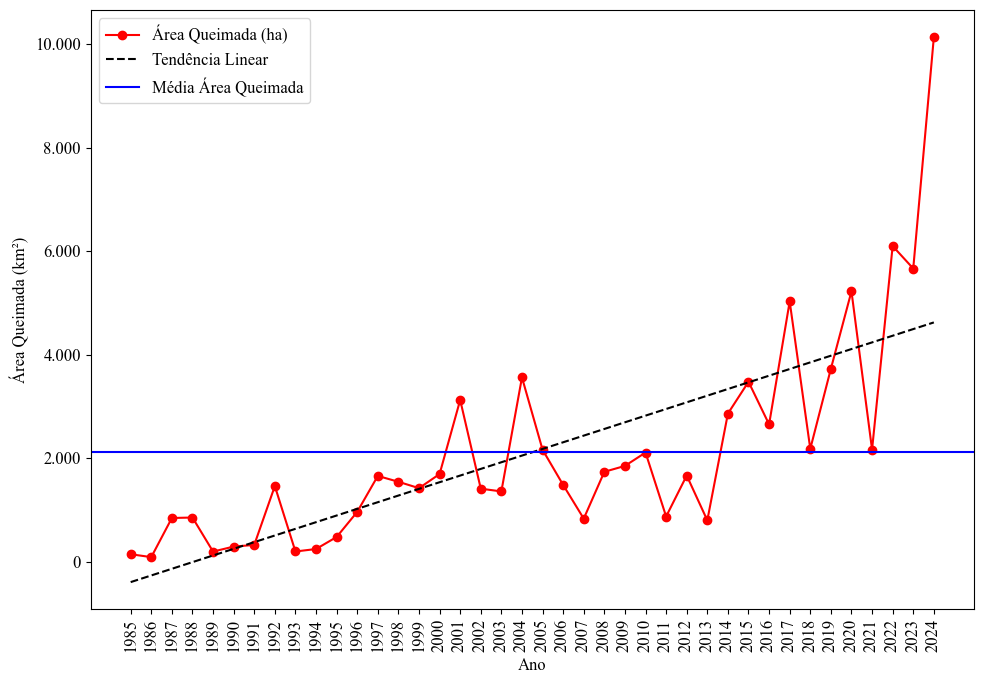

In [46]:
#%% Distribuição Anual
df_fire_year = df.groupby('year')['Área ha'].sum().reset_index()

# --- NOVO BLOCO: Teste de Mann-Kendall ---
print("\n--- Resultados do Teste de Mann-Kendall ---")
# Aplicando o teste na série temporal de 'Área ha'
result = mk.original_test(df_fire_year['Área ha'])

print(f"Tendência: {result.trend}")
print(f"p-valor: {result.p:.6f}")
print(f"Estatística Z: {result.z:.4f}")
print(f"Estatística S: {result.s}")

# Interpretação simples
if result.p < 0.05:
    print(f"\nInterpretação: Foi detectada uma tendência de '{result.trend}' estatisticamente significativa (p < 0.05).")
else:
    print(f"\nInterpretação: Nenhuma tendência estatisticamente significativa foi detectada (p >= 0.05).")
print("-------------------------------------------\n")
# --- FIM DO NOVO BLOCO ---

# Cálculo da média
media_area_queimada = df_fire_year["Área ha"].mean()

# Cálculo da tendência linear
slope, intercept, r_value, p_value, std_err = stats.linregress(df_fire_year.index, df_fire_year["Área ha"])

# Adicionando a tendência linear ao DataFrame
df_fire_year['trend'] = intercept + slope * df_fire_year.index

# Configurando a fonte globalmente
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

# Plotando os dados, a tendência e a linha da média
ax = plt.figure(figsize=(10, 7))
plt.plot(df_fire_year["year"], df_fire_year["Área ha"], label='Área Queimada (ha)', marker='o', color='red')
plt.plot(df_fire_year["year"], df_fire_year["trend"], label='Tendência Linear', linestyle='--', color='black')
plt.axhline(y=media_area_queimada, color='blue', linestyle='-', label='Média Área Queimada')

# Função para formatar os valores do eixo Y com separador de milhar como ponto
def custom_formatter(x, pos):
    return f'{x:,.0f}'.replace(',', '.')

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(custom_formatter))

plt.xlabel('Ano')
plt.ylabel('Área Queimada (km²)')
plt.legend()
plt.xticks(df_fire_year["year"], rotation=90)
plt.grid(False)
plt.tight_layout()
plt.show()